# Set default Collab's parameters

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Import data

In [0]:
! git clone https://github.com/IALeMans/24hcode2019.git

Cloning into '24hcode2019'...
remote: Enumerating objects: 150, done.
remote: Counting objects: 100% (150/150), done.
remote: Compressing objects: 100% (111/111), done.
remote: Total 915 (delta 60), reused 125 (delta 39), pack-reused 765
Receiving objects: 100% (915/915), 209.21 MiB | 43.82 MiB/s, done.
Resolving deltas: 100% (193/193), done.


# Initialize the DataBunch

In [0]:
from fastai import *
from fastai.vision import *

DATA_PATH = '24hcode2019/recognizer/data'

Add data augmentation

In [0]:
tfms = get_transforms() ; tfms

([RandTransform(tfm=TfmCrop (crop_pad), kwargs={'row_pct': (0, 1), 'col_pct': (0, 1), 'padding_mode': 'reflection'}, p=1.0, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmAffine (flip_affine), kwargs={}, p=0.5, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmCoord (symmetric_warp), kwargs={'magnitude': (-0.2, 0.2)}, p=0.75, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmAffine (rotate), kwargs={'degrees': (-10.0, 10.0)}, p=0.75, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmAffine (zoom), kwargs={'scale': (1.0, 1.1), 'row_pct': (0, 1), 'col_pct': (0, 1)}, p=0.75, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmLighting (brightness), kwargs={'change': (0.4, 0.6)}, p=0.75, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmLighting (contrast), kwargs={'scale': (0.8, 1.25)}, p=0.75, resolved={}, do_run=True, is_random=True)],
 [RandTransform(tfm=TfmCrop (crop_pad), kwargs={}, p=1.0

Create the DataBunch

In [0]:
data = ImageDataBunch.from_folder(DATA_PATH, valid='val', size=224, bs=24, ds_tfms=tfms)

Do not forget to normalize from imagenet's stats

In [0]:
data = data.normalize(imagenet_stats)

Look at the data

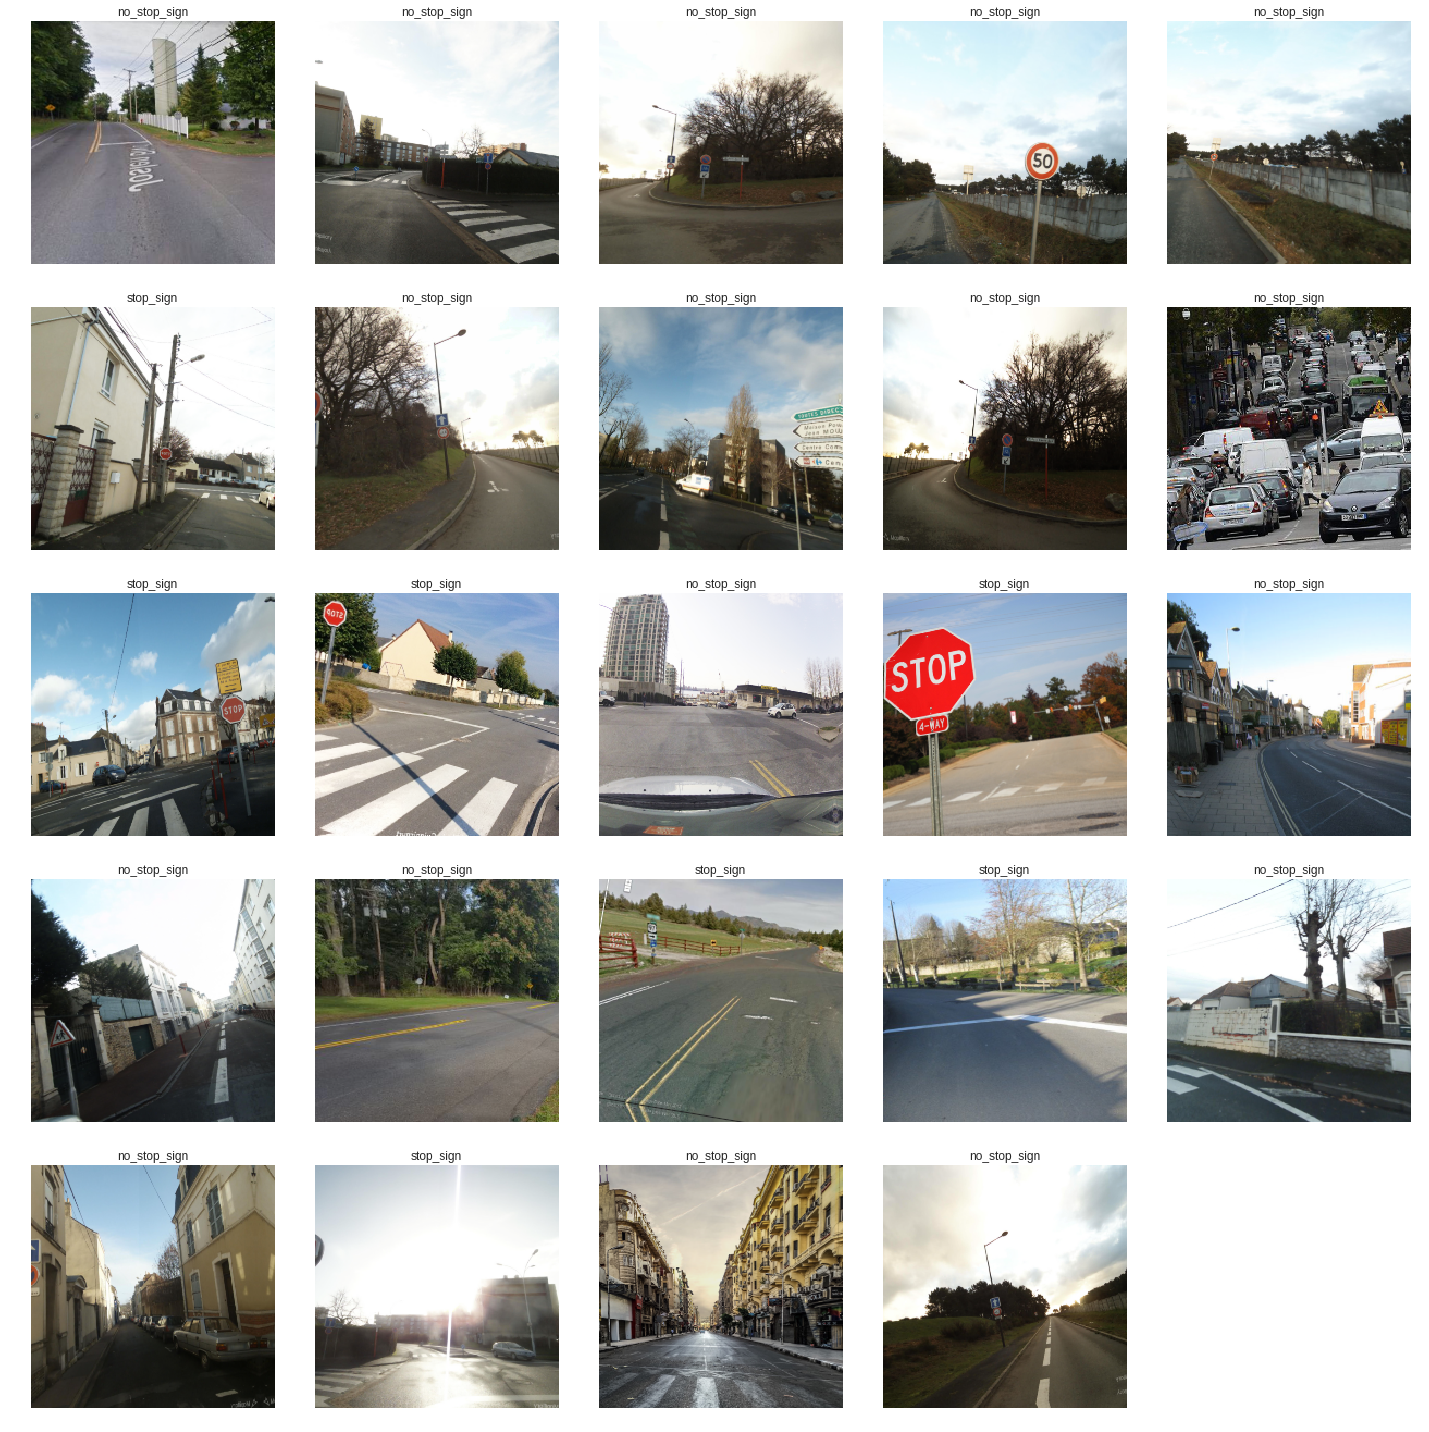

In [0]:
data.show_batch()

In [0]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
87306240it [00:01, 86579245.85it/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 7.59E-03


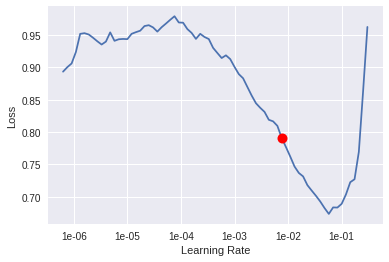

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(4, max_lr=7.59e-03)

epoch,train_loss,valid_loss,error_rate
1,0.606167,0.492976,0.200000
2,0.475181,1.250470,0.325000
3,0.378125,0.478673,0.175000
4,0.307109,0.439351,0.150000


In [0]:
interp = ClassificationInterpretation.from_learner(learn)

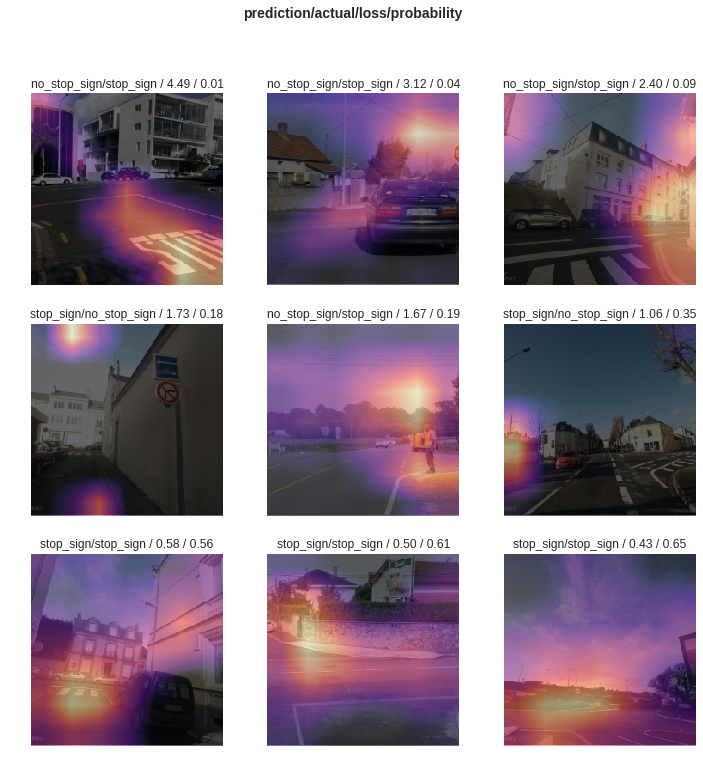

In [0]:
interp.plot_top_losses(9)